In [8]:
import pandas as pd
import pydeseq2 as DESeq2
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats

In [27]:
column_names=['SampleNumber','Multiplexi5index', 'Lane', 'i7index', 'PlateName', 'PlateRow', 'PlateColumn', 'PlateWell', 'RILcode', 'TissueCode', 'Replicate', 'FullSampleName']
RNAtab= pd.read_csv('/home/jovyan/pub/ee283/data/raw/RNAseq_samplecode.txt', names=column_names, sep='\t')
# Select specific columns 
RNAtab2 = RNAtab[["RILcode", "TissueCode", "Replicate", "FullSampleName"]]
RNAtab2=RNAtab2[
    (RNAtab2['RILcode'].isin([21148, 21286, 22162, 21297, 21029, 22052, 22031, 21293, 22378, 22390])) 
    & (RNAtab2['TissueCode'].isin(['B','E']))
    & (RNAtab2['Replicate']==0)
               ]
RNAtab2

,RILcode,TissueCode,Replicate,FullSampleName
0,21148,B,0,21148B0
1,21286,B,0,21286B0
2,22162,B,0,22162B0
3,21297,B,0,21297B0
4,21029,B,0,21029B0
5,22052,B,0,22052B0
6,22031,B,0,22031B0
7,21293,B,0,21293B0
8,22378,B,0,22378B0
9,22390,B,0,22390B0


In [28]:
RNAtab2["BamFile"] = RNAtab2.apply(lambda row: f"{row['RILcode']}_{row['TissueCode']}.sort.bam", axis=1)
columns_keep=['BamFile','TissueCode']
RNAtab2=RNAtab2[columns_keep]
RNAtab2
RNAtab2 = RNAtab2.set_index("TissueCode")


In [11]:
count_data= pd.read_csv('/home/jovyan/pub/ee283/data/processed/RNAseq/bams/fly_counts.txt',sep='\t', comment='#',index_col=0)
#print(count_data).head()
#print(count_data.dtypes)  
count_data = count_data.iloc[:, 5:]
print(count_data.dtypes)
#len(count_data)


                21029_B.sort.bam  21029_E.sort.bam  21148_B.sort.bam  \
Geneid                                                                 
srRNA                          0                 0                 0   
trnV                           0                 0                 0   
lrRNA                          0                 0                 0   
trnL2                          0                 0                 0   
ND1                            0                 0                 0   
...                          ...               ...               ...   
tyn                            4               589                 2   
mir-4915                       0                 0                 0   
RhoGAP1A                     130                97                78   
CG17636                        8                 0                 1   
lncRNA:CR40469               128                53                98   

                21148_E.sort.bam  21286_B.sort.bam  21286_E.sor

AttributeError: 'NoneType' object has no attribute 'head'

In [14]:
count_data = count_data.transpose()
print(count_data)

Geneid            srRNA  trnV  lrRNA  trnL2  ND1  trnS1  CYTB  ND6  trnP  \
21029_B.sort.bam      0     0      0      0    0      0     0    0     0   
21029_E.sort.bam      0     0      0      0    0      0     0    0     0   
21148_B.sort.bam      0     0      0      0    0      0     0    0     0   
21148_E.sort.bam      0     0      0      0    0      0     0    0     0   
21286_B.sort.bam      0     0      0      0    0      0     0    0     0   
21286_E.sort.bam      0     0      0      0    0      0     0    0     0   
21293_B.sort.bam      0     0      0      0    0      0     0    0     0   
21293_E.sort.bam      0     0      0      0    0      0     0    0     0   
21297_B.sort.bam      0     0      0      0    0      0     0    0     0   
21297_E.sort.bam      0     0      0      0    0      0     0    0     0   
22031_B.sort.bam      0     0      0      0    0      0     0    0     0   
22031_E.sort.bam      0     0      0      0    0      0     0    0     0   
22052_B.sort

In [34]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats  

# Ensure that 'TissueCode' is categorical
metadata["TissueCode"] = metadata["TissueCode"].astype("category")

# Fit the model (IMPORTANT)
dds.deseq2()

Fitting size factors...
... done in 0.01 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 2.55 seconds.

Fitting dispersion trend curve...
... done in 1.52 seconds.

Fitting MAP dispersions...
... done in 2.71 seconds.

Fitting LFCs...
... done in 2.20 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 37 outlier genes.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting LFCs...
... done in 0.02 seconds.



In [33]:
# Create DESeq2 dataset
dds = DeseqDataSet(counts=count_data, metadata=metadata, design="~TissueCode")  
dds

AnnData object with n_obs × n_vars = 20 × 17868
    obs: 'TissueCode'
    obsm: 'design_matrix'

In [39]:
# Run DESeq2 analysis for B vs E
stat_res = DeseqStats(dds, contrast=["TissueCode", "B", "E"])  
stat_res.summary()  

# Get results
res_df = stat_res.results_df
print(res_df.head())

Running Wald tests...


Log2 fold change & Wald test p-value: TissueCode B vs E
                  baseMean  log2FoldChange     lfcSE       stat  \
Geneid                                                            
srRNA             0.000000             NaN       NaN        NaN   
trnV              0.000000             NaN       NaN        NaN   
lrRNA             0.000000             NaN       NaN        NaN   
trnL2             0.000000             NaN       NaN        NaN   
ND1               0.000000             NaN       NaN        NaN   
...                    ...             ...       ...        ...   
tyn             389.213581       -7.080514  0.223441 -31.688490   
mir-4915          0.000000             NaN       NaN        NaN   
RhoGAP1A        152.456219       -0.565985  0.101724  -5.563951   
CG17636           2.306442        1.248217  0.817019   1.527771   
lncRNA:CR40469   78.121965        0.473978  0.611715   0.774835   

                       pvalue           padj  
Geneid                   

... done in 1.66 seconds.



In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

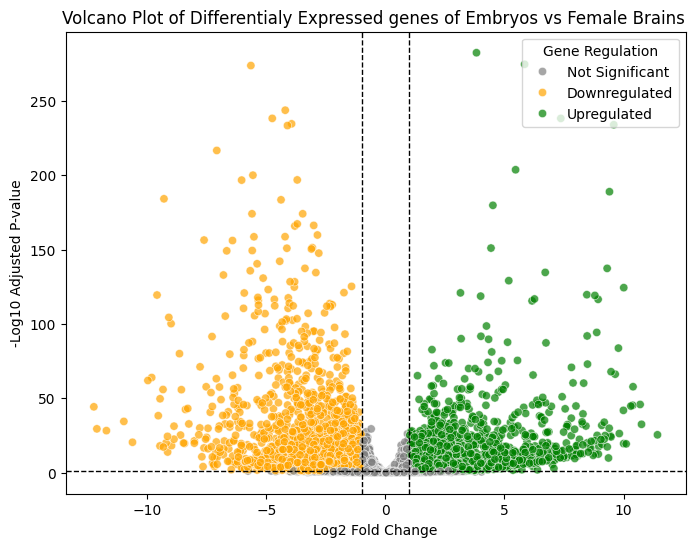

In [49]:
# Set significance thresholds
lfc_threshold = 1  # Change in expression (log2)
pval_threshold = 0.05  # Adjusted p-value cutoff

# Extract log2 fold change and adjusted p-values
res_df["-log10(padj)"] = -np.log10(res_df["padj"])

# Define significance
res_df["Significant"] = "Not Significant"
res_df.loc[(res_df["padj"] < pval_threshold) & (res_df["log2FoldChange"] > lfc_threshold), "Significant"] = "Upregulated"
res_df.loc[(res_df["padj"] < pval_threshold) & (res_df["log2FoldChange"] < -lfc_threshold), "Significant"] = "Downregulated"

# Create the plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=res_df, x="log2FoldChange", y="-log10(padj)",
    hue="Significant", palette={"Not Significant": "gray", "Upregulated": "green", "Downregulated": "orange"},
    alpha=0.7
)
# Add significance lines
plt.axhline(-np.log10(pval_threshold), linestyle="--", color="black", linewidth=1)  # p-value threshold
plt.axvline(-lfc_threshold, linestyle="--", color="black", linewidth=1)  # LFC cutoff
plt.axvline(lfc_threshold, linestyle="--", color="black", linewidth=1)

# Labels
plt.xlabel("Log2 Fold Change")
plt.ylabel("-Log10 Adjusted P-value")
plt.title("Volcano Plot of Differentialy Expressed genes of Embryos vs Female Brains ")
plt.legend(title="Gene Regulation", loc="upper right")

plt.savefig("RNA_deg_analysis.png", dpi=300, bbox_inches="tight")
plt.show()